<a href="https://colab.research.google.com/github/junher30/09-week/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Ventas Simuladas 2023

## ¿De qué va este código?

La idea es crear un pequeño proyecto para practicar cómo trabajar con fechas, agrupar datos por meses y trimestres, sacar estadísticas y hacer un gráfico que se vea decente para entender las ventas a lo largo del año.

## Qué datos estamos usando

- **Fechas:** Se generan todas las fechas desde el 1 de enero hasta el 31 de diciembre de 2023.
- **Ventas:** Números aleatorios entre 100 y 1000, que simulan las ventas diarias. 

## Lo que hace el código

1. **Agrega columnas de tiempo:**
   - Se identifica en qué trimestre está cada fecha.
   - También se asigna el mes para poder analizar las ventas mensualmente.

2. **Saca estadísticas por trimestre:**
   - Calcula datos como el promedio, mínimos, máximos, etc., para ver cómo se movieron las ventas cada 3 meses.

3. **Calcula el promedio de ventas por mes:**
   - Nos da una idea de qué meses se vendió más o menos, aunque sean datos inventados.

4. **Hace un gráfico bonito:**
   - Se crea un gráfico de barras que muestra el promedio de ventas por mes, para que sea más fácil de entender visualmente.

## Herramientas que se usan

- **Pandas:** Para manejar las fechas y organizar los datos.
- **NumPy:** Para generar los datos de ventas aleatorios.
- **Matplotlib:** Para hacer el gráfico de barras.

## ¿Para qué sirve?

Más que todo para practicar cómo trabajar con datos que tienen fechas y cómo presentar esos datos de forma clara. Se puede mejorar añadiendo análisis más complejos o haciendo predicciones.

Estadísticas por trimestre:
           count        mean         std    min     25%    50%     75%    max
trimestre                                                                    
2023Q1      90.0  531.944444  264.678281  101.0  307.25  531.0  757.25  997.0
2023Q2      91.0  576.923077  275.196505  104.0  323.50  592.0  826.50  991.0
2023Q3      92.0  581.173913  237.003343  101.0  364.75  607.0  772.25  999.0
2023Q4      92.0  539.739130  262.565402  101.0  299.25  517.0  758.25  996.0


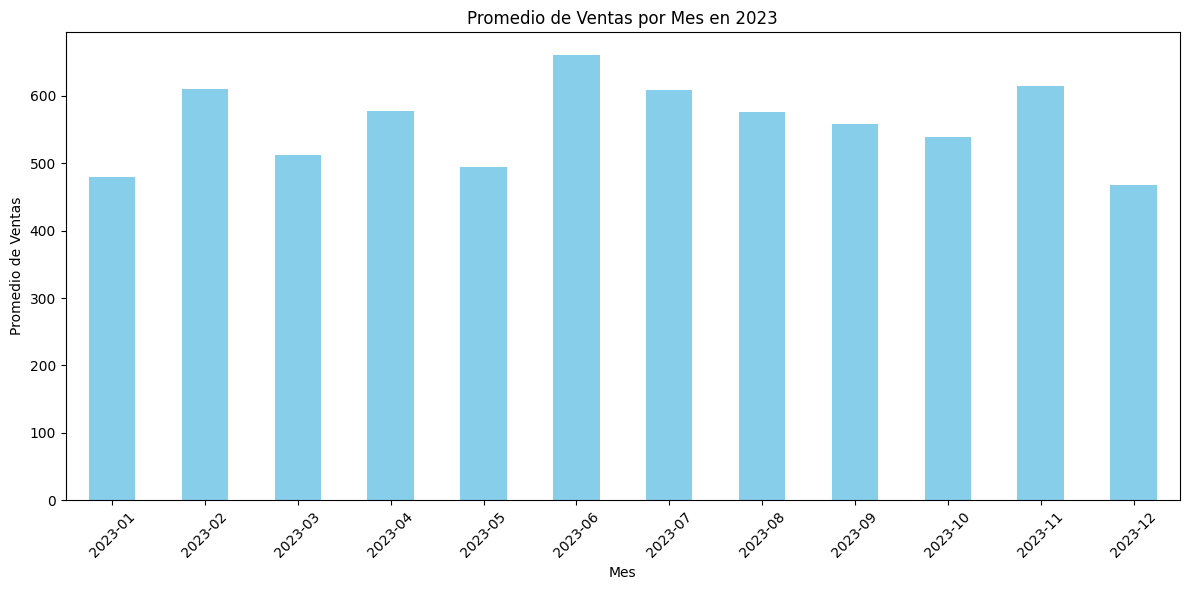

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear un dataset simulado con fechas y ventas
np.random.seed(42)
fechas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
ventas = np.random.randint(100, 1000, size=len(fechas))
df = pd.DataFrame({'fecha': fechas, 'ventas': ventas})

# 2. Agregar columna de trimestre
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 3. Estadísticas descriptivas por trimestre
estadisticas_trimestrales = df.groupby('trimestre')['ventas'].describe()
print("Estadísticas por trimestre:")
print(estadisticas_trimestrales)

# 4. Agregar columna de mes
df['mes'] = df['fecha'].dt.to_period('M')

# 5. Calcular promedio de ventas por mes
promedio_mensual = df.groupby('mes')['ventas'].mean()

# 6. Visualizar el promedio mensual de ventas
promedio_mensual.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Promedio de Ventas por Mes en 2023')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#  Ingresar y Analizar Ventas Manualmente

## ¿De qué se trata este código?

La idea es que el usuario pueda ingresar manualmente sus propios datos de ventas y fechas, para que luego el código arme un pequeño análisis por trimestres y meses. Y claro, también un gráfico para ver cómo van las ventas.

## ¿Qué hace el código?

1. **Ingreso de datos manual:**
   - Pregunta cuántos registros de ventas vamos a ingresar.
   - Luego, uno por uno, se ingresan la fecha (formato AAAA-MM-DD) y el monto de ventas.

2. **Crea un DataFrame con pandas:**
   - Se arma una tabla con las fechas y las ventas ingresadas.
   - Además, se agregan columnas nuevas para el trimestre y el mes de cada fecha.

3. **Estadísticas por trimestre:**
   - El código muestra un resumen por cada trimestre con:
     - Promedio
     - Mínimos y máximos
     - Cuartiles, etc.

4. **Promedio mensual de ventas:**
   - Calcula cuánto fue, en promedio, lo que se vendió cada mes.

5. **Gráfico de barras:**
   - Para cerrar con broche de oro, se genera un gráfico que muestra las ventas promedio por mes de forma visual y clara.

## Herramientas que se usan:

- **Pandas:** Para organizar y procesar los datos.
- **Matplotlib:** Para crear el gráfico de barras.
- **Funciones básicas de Python:** Para pedir datos al usuario.

## ¿Para qué puede servir?

Es una buena base para proyectos pequeños o para aprender a manejar pandas desde cero.  
Incluso podrías adaptar este código para llevar control de ventas reales de un pequeño negocio o un emprendimiento.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pedir número de registros
n = int(input("¿Cuántos registros vas a ingresar?: "))

# Listas vacías
fechas = []
ventas = []

# Ingreso de datos
for i in range(n):
    fecha = input(f"Ingresá la fecha #{i+1} (formato AAAA-MM-DD): ")
    venta = float(input(f"Ingresá las ventas de esa fecha: "))
    fechas.append(fecha)
    ventas.append(venta)

# Crear DataFrame
df = pd.DataFrame({'fecha': fechas, 'ventas': ventas})
df['fecha'] = pd.to_datetime(df['fecha'])
df['trimestre'] = df['fecha'].dt.to_period('Q')
df['mes'] = df['fecha'].dt.to_period('M')

# Estadísticas descriptivas por trimestre
print("\n Estadísticas descriptivas por trimestre:")
print(df.groupby('trimestre')['ventas'].describe())

# Promedio mensual
promedio_mensual = df.groupby('mes')['ventas'].mean()

# Mostrar DataFrame final
print("\n DataFrame con datos procesados:")
print(df)

# Visualización
promedio_mensual.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Promedio de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
